In [1]:
# imports
import pandas as pd
import random
import time
from functions import vanilla_score
from functions import kippendorff_analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define a placeholder function for vanilla_score
def random_score(text):
    return random.randint(1, 5)  # Placeholder to return a random score

In [3]:
# read in text data --> text_data
text_data = pd.read_csv('Data/texts.csv').drop(columns='Q')
text_data['T'] = text_data['T'].str.replace('T', '').astype(int)
text_data

T                                               Text      Source  \
0    1  Find Your Dream Sofa at Westwing: Transform Yo...  GenAI Tool   
1    2  Explore Sustainable and Stylish Backpacks at G...  GenAI Tool   
2    3  Designer clothes have always been one of the m...   Websearch   
3    4  Whether you're a seasoned gardener or just sta...   Websearch   
4    5  Driving the energy transition: Solutions for i...   Websearch   
5    6  Chocolate, Sugar Snap and Orange Dessert Recip...   Websearch   
6    7  Large Format Cinematic Digital Film Sensor!\nB...   Websearch   
7    8  N26 Smart—save and spend with confidence\nDisc...   Websearch   
8    9  CHANGE THE WAY YOU MONEY\nFor those who want m...   Websearch   
9   10  ADUHELM is indicated for the treatment of Alzh...   Websearch   
10  11  We have a bold ambition to provide cures for c...   Websearch   
11  12  Cable Termination\nThe IP Controller Sensor Bu...   Websearch   
12  13  Private equity is in our DNA. We are the world...   Websearch   
13  14  Go Big With Mini\nDJI Mini 4 Pro is our most a...   Websearch   
14  15  A stepping-stone to advanced helicopters As a ...   Websearch   
15  16  Welcome to Energy Solutions, Your Partner in P...  ChatGPT 4o   
16  17  Equip and support learners with AI tools from ...   Websearch   
17  18  The Deloitte Accounting Research Tool (DART) i...   Websearch   
18  19  Welcome, dear readers, to this grand and sumpt...  ChatGPT 4o   
19  20  Experience Unmatched Performance with NVIDIA G...  ChatGPT 4o   
20  21  Deploying data as a strategic asset\nLaw firms...   Websearch   

                               Industry      Interest Category  
0             Consumer Goods and Retail       General Interest  
1             Consumer Goods and Retail       General Interest  
2             Consumer Goods and Retail  Professional Interest  
3             Consumer Goods and Retail       General Interest  
4                Energy and Environment       General Interest  
5                     Food and Beverage  Professional Interest  
6   Entertainment / Media and Education       Special Interest  
7        Financial Services and FinTech       Special Interest  
8        Financial Services and FinTech       General Interest  
9        Healthcare and Pharmaceuticals  Professional Interest  
10       Healthcare and Pharmaceuticals       General Interest  
11         Manufacturing and Industrial  Professional Interest  
12       Financial Services and FinTech  Professional Interest  
13           Technology and Electronics       Special Interest  
14         Manufacturing and Industrial       Special Interest  
15               Energy and Environment       General Interest  
16  Entertainment / Media and Education  Professional Interest  
17                Professional Services  Professional Interest  
18                    Food and Beverage       General Interest  
19           Technology and Electronics  Professional Interest  
20                Professional Services       Special Interest

In [7]:
import time

gpt_dict = {
    # "gpt35t": "gpt-3.5-turbo-0125",
    # "gpt4": "gpt-4-0613",
    # "gpt4t": "gpt-4-turbo-2024-04-09",
    #"gpt4o": "gpt-4o-2024-05-13",
    "nemotron4340b":"nvidia/Nemotron-4-340B-Instruct"
}

duration = [['Model', 0, 0.2, 0.4, 0.6, 0.8, 1]]

for name in gpt_dict:
    times = [name]
    for temp in [0, 0.2, 0.4, 0.6, 0.8, 1]:
        model = gpt_dict.get(name)
        temperature = temp
        evaluations = 20
        texts = [1, 4, 6, 9, 10, 11, 14, 16, 19, 20]

        # create variables
        evaluator = 'vanilla_' + name + f"_{int(temp * 10):02}" # will contain score counts and descriptive statistics
        scores = evaluator + '_scores' # contains raw scores in wide format
        direction = 'Data_LLM/' + scores + '.csv'

        globals()[scores] = text_data[['T', 'Text']]
        globals()[scores] = globals()[scores].loc[globals()[scores]['T'].isin(texts)] # subset to only run for texts

        # collect and transform scores --> vanilla_GPT35_0_scores
        start_time = time.process_time()
        for i in range(1, evaluations+1): # create {evaluations} columns with scores
            # globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(random_score(x)))
            globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(vanilla_score(x, model=model, temperature=temperature, reason=False)))
        end_time = time.process_time()
        eval_time = end_time - start_time
        times.append(eval_time)

        globals()[scores] = globals()[scores].drop(columns=['Text'])
        globals()[scores] = globals()[scores].set_index('T').rename_axis(scores, axis='columns')
        globals()[scores]
        globals()[scores].to_csv(direction)

        
    duration.append(times)
    print(times)

duration = pd.DataFrame(duration[1:], columns=duration[0])
duration

ValueError: Unsupported model: nvidia/Nemotron-4-340B-Instruct

In [4]:
# Mapping of easy model names to actual model identifiers
MODEL_MAPPING = {
    # "mistral7b": {"model": "mistralai/Mistral-7B-Instruct-v0.3", "provider": "deepinfra"},
    # "mixtral8x22b": {"model": "mistralai/Mixtral-8x22B-Instruct-v0.1", "provider": "deepinfra"},
    # "llama370b": {"model": "meta-llama/Meta-Llama-3-70B-Instruct", "provider": "deepinfra"},
    # "llama38b": {"model": "meta-llama/Meta-Llama-3-8B-Instruct", "provider": "deepinfra"},
    # "llama38b_private": {"model": "gpt-3.5-turbo", "provider": "ommax_vllm"}, # model name is faked for openai compatibility
    # "claude3opus": {"model": "claude-3-opus-20240229", "provider": "anthropic"},
    # "claude3sonnet": {"model": "claude-3-sonnet-20240229", "provider": "anthropic"},
    # "claude3haiku": {"model": "claude-3-haiku-20240307", "provider": "anthropic"},

    # "qwen2": {"model": "Qwen/Qwen2-72B-Instruct", "provider": "deepinfra"},
    # "phi3": {"model": "microsoft/Phi-3-medium-4k-instruct", "provider": "deepinfra"},
    # "wizardLM28x22b": {"model": "microsoft/WizardLM-2-8x22B", "provider": "deepinfra"},
    # "wizardLM27b": {"model": "microsoft/WizardLM-2-7B", "provider": "deepinfra"},
    # "gemma": {"model": "google/gemma-1.1-7b-it", "provider": "deepinfra"},
    "nemotron4340b": {"model": "nvidia/Nemotron-4-340B-Instruct", "provider": "nvidia"},
}

duration = [['Model', 0, 0.2, 0.4, 0.6, 0.8, 1]]


for model in MODEL_MAPPING:
    times = [model]
    for temp in [0, 0.2, 0.4, 0.6, 0.8, 1]: #
        model = model
        temperature = temp
        evaluations = 20
        texts = [1, 4, 6, 9, 10, 11, 14, 16, 19, 20]

        # create variables
        evaluator = 'vanilla_' + model + f"_{int(temp * 10):02}" # will contain score counts and descriptive statistics
        scores = evaluator + '_scores' # contains raw scores in wide format
        direction = 'Data_LLM/' + scores + '.csv'

        globals()[scores] = text_data[['T', 'Text']]
        globals()[scores] = globals()[scores].loc[globals()[scores]['T'].isin(texts)] # subset to only run for texts

        # collect and transform scores --> vanilla_GPT35_0_scores
        start_time = time.process_time()
        for i in range(1, evaluations+1): # create {evaluations} columns with scores
            # globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(random_score(x)))
            globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(vanilla_score(x, model=model, temperature=temperature, reason=False)))
        end_time = time.process_time()
        eval_time = end_time - start_time
        times.append(eval_time)

        globals()[scores] = globals()[scores].drop(columns=['Text'])
        globals()[scores] = globals()[scores].set_index('T').rename_axis(scores, axis='columns')
        globals()[scores]
        globals()[scores].to_csv(direction)

        
    duration.append(times)
    print(times)

duration = pd.DataFrame(duration[1:], columns=duration[0])
duration


Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type SystemMessage is not JSON serializable
Error: Object of type Sy

KeyboardInterrupt: 

In [8]:
# Get scores and descriptive statistics --> vanilla_GPT35_0 and vanilla_GPT35_0_scores
# Settings
model = 'llama370b'
temperature = 1
evaluations = 1
texts = [1, 4, 6, 9, 10, 11, 14, 16, 19, 20] #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]  

# create variables
evaluator = 'test' # will contain score counts and descriptive statistics
scores = evaluator + '_scores' # contains raw scores in wide format
summary = evaluator + '_summary' ##TODO: to be removed 
direction = 'Data_LLM/' + scores + '.csv' 

globals()[scores] = text_data[['T', 'Text']]
globals()[scores] = globals()[scores].loc[globals()[scores]['T'].isin(texts)] # subset to only run for texts

# collect and transform scores --> vanilla_GPT35_0_scores
for i in range(1, evaluations+1): # create {evaluations} columns with scores
    # globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(random_score(x)))
    globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(vanilla_score(x, model=model, temperature=temperature, reason=False)))

globals()[scores] = globals()[scores].drop(columns=['Text'])
globals()[scores] = globals()[scores].set_index('T').rename_axis(scores, axis='columns')
globals()[scores]
globals()[scores].to_csv(direction)


In [ ]:
# # get descriptive statistics and add to vanilla_GPT35_0 --> vanilla_GPT35_0
# globals()[evaluator] = globals()[scores].describe().transpose()[['mean', 'std', 'count']].round(2) # descriptive statistics
# globals()[evaluator]['score'] = globals()[evaluator]['mean'].round(0) # final score is the mean rounded to the nearest integer
# globals()[evaluator]
# globals()[scores]

In [58]:
# Analysis
kippendorff_analysis(value_counts=globals()[scores].select_dtypes(include=['int']))

Krippendorff's alpha: 0.830
95% CI: 0.785 - 0.829
Confidence of data being reliable and alpha being at least 0.8: 74.3%
Confidence of data being tentatively reliable and alpha being at least 0.667: 100.0%
Confidence of data being unreliable and alpha being less than 0.667: 0.0%



In [9]:
globals()[scores]

vanilla_llama370b_10_scores  score 1  score 2  score 3  score 4  score 5  \
T                                                                          
1                                  3        3        3        3        4   
2                                  2        2        2        2        2   
3                                  3        3        3        3        3   
4                                  3        3        3        3        3   
5                                  2        2        3        2        2   
6                                  1        1        1        1        1   
7                                  2        2        2        2        2   
8                                  2        2        2        2        2   
9                                  2        2        2        1        2   
10                                 1        1        1        1        2   
11                                 2        2        2        2        2   
12                                 2        2        1        1        2   
13                                 2        2        2        1        2   
14                                 2        2        2        2        2   
15                                 2        2        2        2        2   
16                                 4        4        4        4        4   
17                                 2        2        2        2        2   
18                                 2        2        2        2        2   
19                                 5        5        5        5        5   
20                                 2        2        2        2        2   
21                                 2        2        2        2        2   

vanilla_llama370b_10_scores  score 6  score 7  score 8  score 9  score 10  \
T                                                                           
1                                  3        3        3        3         3   
2                                  2        2        2        2         2   
3                                  2        3        2        2         3   
4                                  3        3        3        3         4   
5                                  2        2        2        2         3   
6                                  1        1        1        1         1   
7                                  2        2        2        2         2   
8                                  2        2        2        2         2   
9                                  2        1        1        2         1   
10                                 1        1        1        1         1   
11                                 2        2        2        2         2   
12                                 2        1        2        2         2   
13                                 2        2        2        2         2   
14                                 2        2        2        2         2   
15                                 2        2        2        2         2   
16                                 4        4        4        4         4   
17                                 2        2        2        2         2   
18                                 1        2        2        2         2   
19                                 5        5        5        5         5   
20                                 2        2        2        2         2   
21                                 2        2        2        2         2   

vanilla_llama370b_10_scores  score 11  score 12  score 13  score 14  score 15  
T                                                                              
1                                   3         3         3         3         3  
2                                   2         2         2         2         2  
3                                   3         2         2         3         3  
4                                   3         3         3         3         3  

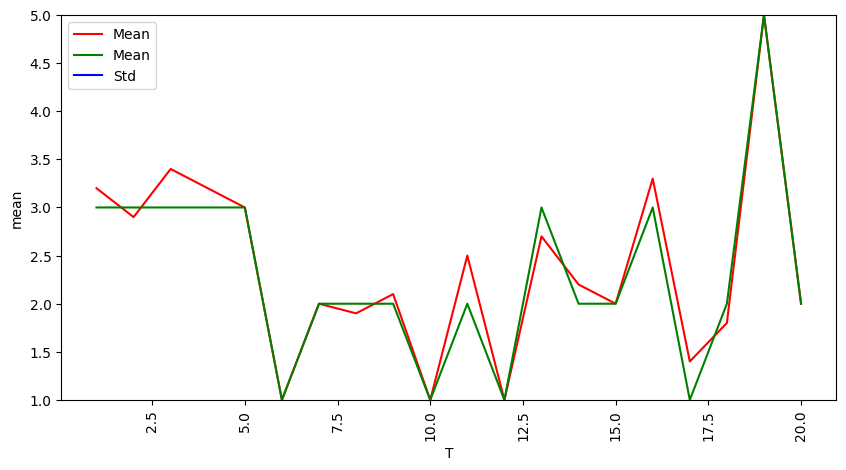

In [64]:
# Visualize
data = globals()[scores]
plt.figure(figsize=(10, 5))
sns.lineplot(x='T', y='mean', data=globals()[scores].sort_values('mean',ascending=False), color='red', label='Mean')
sns.lineplot(x='T', y='score', data=globals()[scores], color='green', label='Mean')
sns.lineplot(x='T', y='std', data=globals()[scores], color='blue', label='Std')
# sns.boxplot(x='T', y='score', data=data, fill=False)
plt.xticks(rotation=90)
plt.ylim(1, 5)
plt.show()